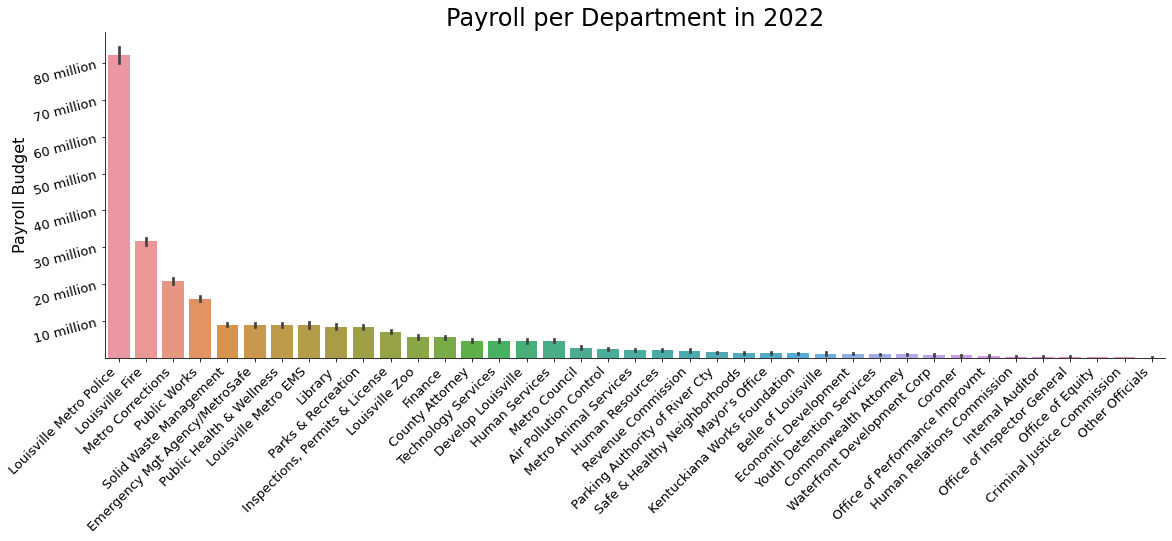

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rcParams


#This section is for retrieving and cleaning the data
#This url makes it so you don't have to load up the file as long as you have an internet connection
def DataClean():
  url="https://raw.githubusercontent.com/chrislockhartky/Data_1_Final/main/original_csv/MetroSalary.csv"
  df=pd.read_csv(url)
  df=df[df.CalYear==2022]
  #Specific employee names are irrelevant and may lead to privacy concerns
  #Other columns are dropped due to being out of scope for the project. We're concerned with 
  df=df.drop(columns=["Employee_Name","Incentive_Allowance","Other","Annual_Rate"])
  return df

#This section is for creating a graph that tells us how much each department spends on payroll, in other words all money spent on wages.
#Fist line is so we can actually order the graph by value.
def BarChart(BarData):
  rcParams["figure.figsize"]= 19, 6
  PayrollOrder=df.groupby(["Department"])["YTD_Total"].sum().sort_values(ascending=False).index
  ax=sns.barplot(x="Department", y="YTD_Total", data=df, estimator=sum, order=PayrollOrder)
  sns.despine()
  plt.xlabel("")
  plt.ylabel("Payroll Budget", size=16)
  plt.title("Payroll per Department in 2022", size=24)
  plt.xticks(rotation= 45, ha="right", size=13)
  #setting million as a variable for readability because we are dealing with large numbers here
  million=1000000
  plt.yticks([10*million, 20*million,30*million, 40*million,50*million, 60*million,70*million, 80*million],
           ["10 million","20 million","30 million","40 million","50 million","60 million","70 million", "80 million"],
           rotation=15, size=13   )

df=DataClean()
BarChart(df);

We can see that LMPD is the largest department in terms of payroll, followed by fire then corrections. After Law and Fire, the next largest grouping is infrastructure with Public Works and Sanitation. Then the health agencies of EMS, Public Health, and Metro Safe are all grouped together. And then come amenities like the library, parks. and zoo. Bur what if we wanted to find a way to control those costs? Well looking at the data we can see that large amounts of payroll budget is spent on overtime.

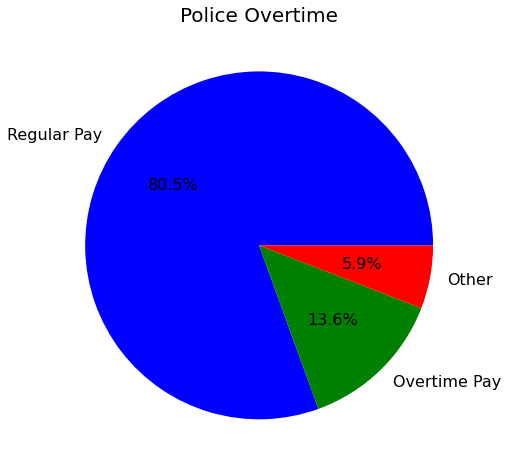

In [28]:
def OvertimeCalc(data, Dept):
    PayList=data.loc[(data["Department"]==Dept), ["Regular_Rate", "Overtime_Rate", "YTD_Total"]].sum()
    RegPay=PayList["Regular_Rate"]/PayList["YTD_Total"]
    OverPay=PayList["Overtime_Rate"]/PayList["YTD_Total"]
    OtherPay=1-OverPay-RegPay
    PieData=[(RegPay), (OverPay),(OtherPay)]
    return PieData

LMPDPie=OvertimeCalc(df, "Louisville Metro Police")

def PayPie(PieDf, PieTitle):
  #PieDF should be returned value of OvertimeCalc, PieTitle should be title for pie chart
  MyLabels=["Regular Pay", "Overtime Pay", "Other"]
  fig, ax=plt.subplots(figsize=(8,8))
  colors=("b","g","r")
  ax.pie(PieDf, labels= MyLabels,colors = colors, autopct='%1.1f%%', textprops={"fontsize":16})
  plt.title(PieTitle, fontsize=20)



PayPie(LMPDPie, "Police Overtime")



Compare Police Overtime to other deparments:

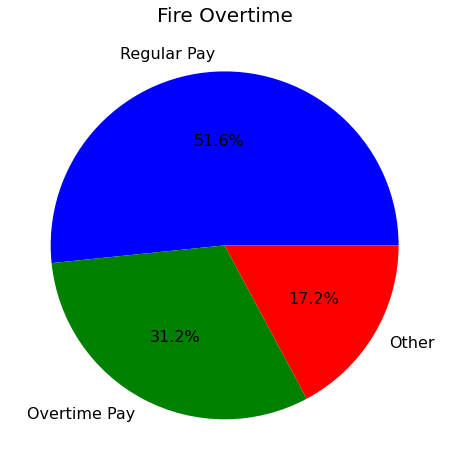

In [11]:
FirePie=OvertimeCalc(df,"Louisville Fire")
PayPie(FirePie, "Fire Overtime")

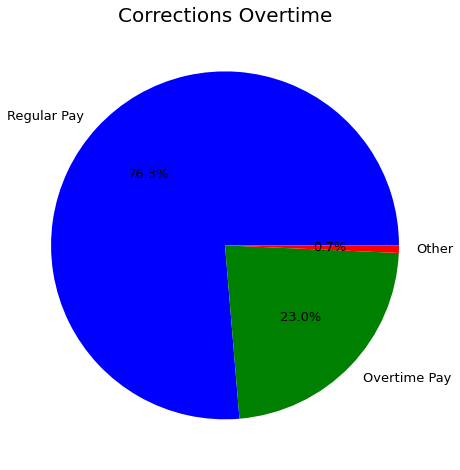

In [17]:
JailPie=OvertimeCalc(df,"Metro Corrections")
PayPie(JailPie, "Corrections Overtime")

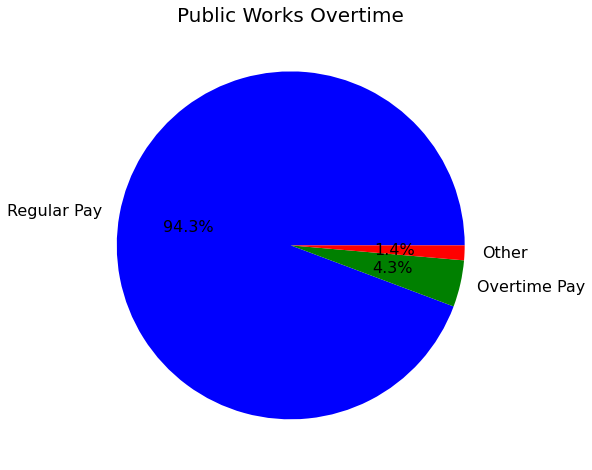

In [15]:
FirePie=OvertimeCalc(df,"Public Works")
PayPie(FirePie, "Public Works Overtime")

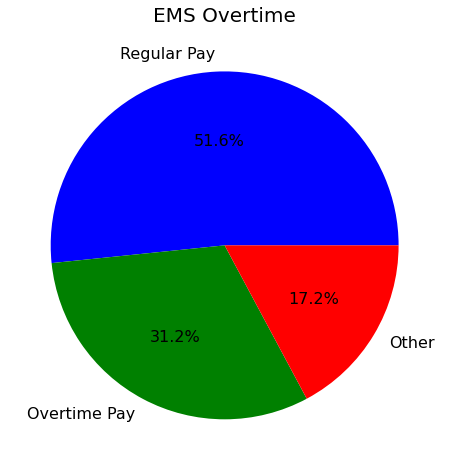

In [14]:
EMSPie=OvertimeCalc(df,"Louisville Metro EMS")
PayPie(FirePie, "EMS Overtime")

There have been large amounts of news stories in the local media about how understaffed Metro Corrections is. Yet when we look at the visualized data for how much of the payroll is taken up by overtime, we see that Corrections share while large is smaller than the share of overtime taken by Fire and EMS. This suggests that city leaders should look at the staffing requirements of these departments.